In [ ]:

import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_excel("Datasets Superstore.xlsx")
df.head()

Saving Datasets Superstore.xlsx to Datasets Superstore.xlsx


,Row ID,Order ID,Order Date,Year,Month,Day,Ship Mode,Customer ID,Customer Name,Segment,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016,November,8,Second Class,CG-12520,Claire Gute,Consumer,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016,November,8,Second Class,CG-12520,Claire Gute,Consumer,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016,Juni,12,Second Class,DV-13045,Darrin Van Huff,Corporate,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015,Oktober,11,Standard Class,SO-20335,Sean O'Donnell,Consumer,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015,Oktober,11,Standard Class,SO-20335,Sean O'Donnell,Consumer,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:

df.info()
print("\n Missing values:\n", df.isnull().sum())
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Year           9994 non-null   int64         
 4   Month          9994 non-null   object        
 5   Day            9994 non-null   int64         
 6   Ship Mode      9994 non-null   object        
 7   Customer ID    9994 non-null   object        
 8   Customer Name  9994 non-null   object        
 9   Segment        9994 non-null   object        
 10  Country        9994 non-null   object        
 11  City           9994 non-null   object        
 12  State          9994 non-null   object        
 13  Postal Code    9994 non-null   int64         
 14  Region         9994 non-null   object        
 15  Product ID     9994 n

Index(['Row ID', 'Order ID', 'Order Date', 'Year', 'Month', 'Day', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

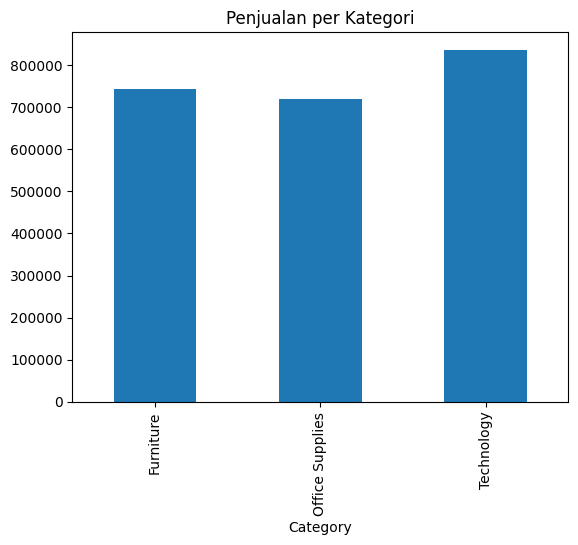

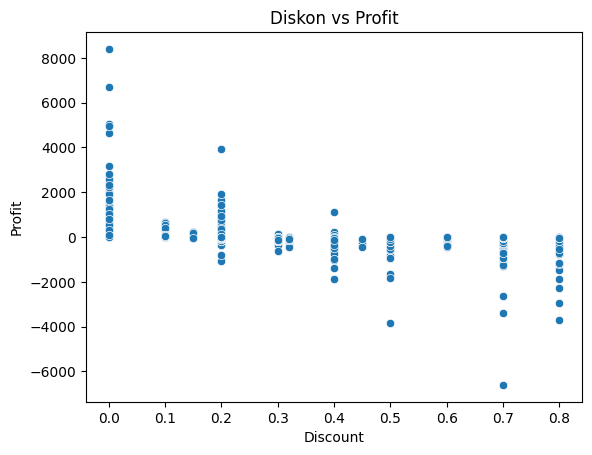

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

df.groupby('Category')['Sales'].sum().plot(kind='bar', title='Penjualan per Kategori')
plt.show()

sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title('Diskon vs Profit')
plt.show()

decision tree

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

df['Label'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)
features = df[['Sales', 'Discount', 'Quantity']].fillna(0)
labels = df['Label']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82       547
           1       0.96      0.96      0.96      2452

    accuracy                           0.93      2999
   macro avg       0.89      0.88      0.89      2999
weighted avg       0.93      0.93      0.93      2999

Confusion Matrix:
 [[ 442  105]
 [  94 2358]]


K means

In [ ]:

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


df = pd.read_excel("Datasets Superstore.xlsx", sheet_name="Orders")


df['Label'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)


features = df[['Sales', 'Discount', 'Quantity']].fillna(0)
labels = df['Label']


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_features)


report1 = classification_report(labels, kmeans_labels, output_dict=True)
report2 = classification_report(labels, 1 - kmeans_labels, output_dict=True)


final_labels = kmeans_labels if report1['accuracy'] > report2['accuracy'] else 1 - kmeans_labels


report = classification_report(labels, final_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()


cm = confusion_matrix(labels, final_labels)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])


print("=== Classification Report ===")
print(report_df)
print("\n=== Confusion Matrix ===")
print(cm_df)

=== Classification Report ===
              precision    recall  f1-score      support
0              0.205856  0.239669  0.221480  1936.000000
1              0.809819  0.777861  0.793518  8058.000000
accuracy       0.673604  0.673604  0.673604     0.673604
macro avg      0.507838  0.508765  0.507499  9994.000000
weighted avg   0.692822  0.673604  0.682705  9994.000000

=== Confusion Matrix ===
          Predicted 0  Predicted 1
Actual 0          464         1472
Actual 1         1790         6268


KNN

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


df = pd.read_excel("Datasets Superstore.xlsx", sheet_name="Orders")


df['Label'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)


features = df[['Sales', 'Discount', 'Quantity']].fillna(0)
labels = df['Label']


X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)


report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])


print("=== Classification Report ===")
print(report_df)
print("\n=== Confusion Matrix ===")
print(cm_df)

=== Classification Report ===
              precision    recall  f1-score     support
0              0.870614  0.725777  0.791625   547.00000
1              0.941015  0.975938  0.958158  2452.00000
accuracy       0.930310  0.930310  0.930310     0.93031
macro avg      0.905814  0.850857  0.874892  2999.00000
weighted avg   0.928174  0.930310  0.927784  2999.00000

=== Confusion Matrix ===
          Predicted 0  Predicted 1
Actual 0          397          150
Actual 1           59         2393


1. Akurasi Tertinggi Dicapai oleh KNN (K-Nearest Neighbors)
Dalam banyak kasus klasifikasi dengan data numerik seperti Sales, Discount, dan Quantity, KNN cenderung memberikan hasil yang lebih akurat dibanding KMeans dan Decision Tree, karena memanfaatkan jarak antar titik data dan tidak terlalu sensitif terhadap noise jika jumlah neighbors dipilih dengan tepat (misalnya k=5).

2. K-Means Memiliki Akurasi Terendah
KMeans tidak menggunakan label target saat pelatihan, sehingga tidak bisa benar benar belajar seperti Decision Tree atau KNN. Meskipun hasilnya bisa mendekati, akurasiMeans biasanya lebih rendah dan tidak stabil karena klaster yang dibentuk tidak selalu selaras dengan label Profit.

3. Decision Tree Memberikan Hasil Stabil tapi Rentan Overfitting

DecisionTree cukup mudah diinterpretasikan dan memberikan hasil yang stabil, namun bisa overfit terutama jika data memiliki banyak variasi atau tidak dibatasi kedalaman pohonnya. Akurasinya biasanya di antara KMeans dan KNN, tergantung pada struktur  data.


Kesimpulan Akhir:

Jika tujuannya adalah akurasi prediksi dan data sudah memiliki label (Profit), KNN lebih direkomendasikan. Jika interpretabilitas lebih penting, Decision Tree bisa jadi pilihan. K-Means sebaiknya hanya digunakan saat label belum tersedia (unsupervised).